# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [3]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
import seaborn as sns

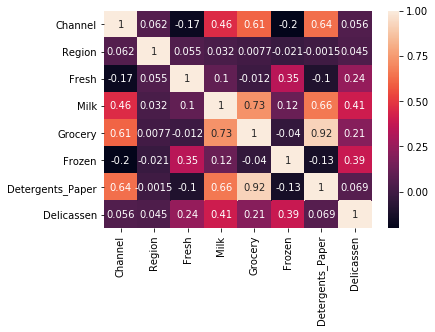

In [9]:
sns.heatmap(customers.corr(), annot=True)

In [10]:
# Your observations here:

# There are no correlation greater than 0,73
# Then I feel free to keep things as they are.

# Channel and Region seems to be categorical features and new to be adjusted to categorical types.

# There are outliers as we can see above. 

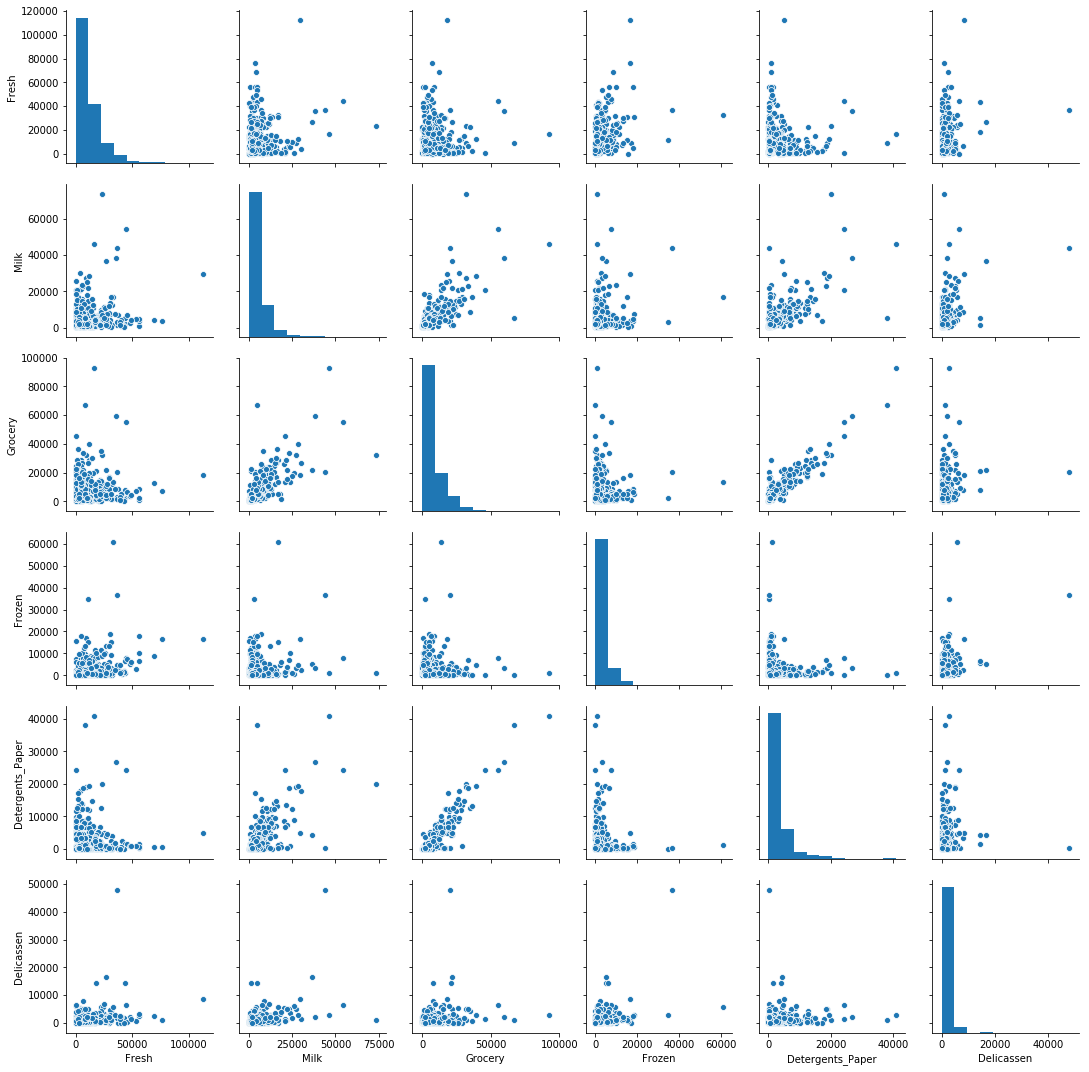

In [11]:
sns.pairplot(customers.drop(columns=['Channel','Region']))

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [12]:
customers['Channel'] = customers.Channel.astype('category')
customers['Region'] = customers.Region.astype('category')

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null category
Region              440 non-null category
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: category(2), int64(6)
memory usage: 21.8 KB


In [14]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
customer_scale = StandardScaler().fit(customers.drop(columns=['Channel','Region'])).transform(customers.drop(columns=['Channel','Region']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans().fit(customer_scale)
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [18]:
customers.labels.value_counts()

4    212
1     98
6     54
0     44
7     21
5      5
3      5
2      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [19]:
from sklearn.cluster import DBSCAN

clustering_DBSCAN = DBSCAN(eps=0.5).fit(customer_scale)
customers['labels_DBSCAN'] = clustering_DBSCAN.labels_

Count the values in `labels_DBSCAN`.

In [20]:
customers.labels_DBSCAN.value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

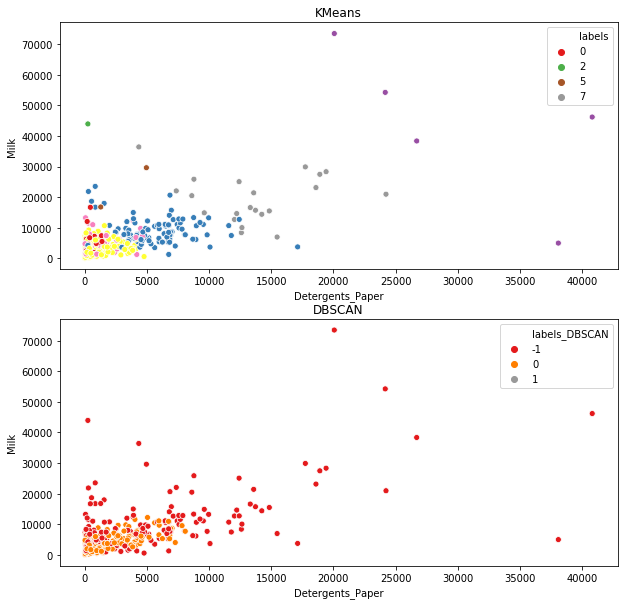

In [21]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
ax1 = sns.scatterplot(data=customers, x='Detergents_Paper', y='Milk', hue='labels', palette="Set1")
plt.legend(loc='upper right')
ax1.set_title('KMeans')

plt.subplot(2, 1, 2)
ax2 = sns.scatterplot(data=customers, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', palette="Set1")
plt.legend(loc='upper right')
ax2.set_title('DBSCAN')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

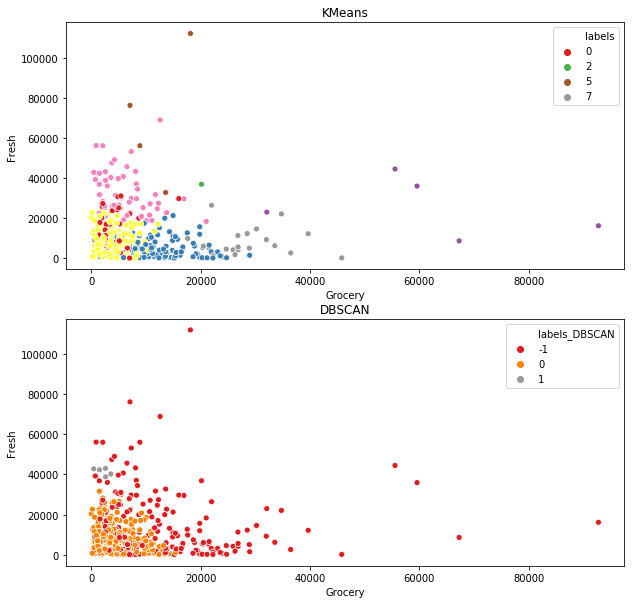

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
ax1 = sns.scatterplot(data=customers, x='Grocery', y='Fresh', hue='labels', palette="Set1")
plt.legend(loc='upper right')
ax1.set_title('KMeans')

plt.subplot(2, 1, 2)
ax2 = sns.scatterplot(data=customers, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette="Set1")
plt.legend(loc='upper right')
ax2.set_title('DBSCAN')


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

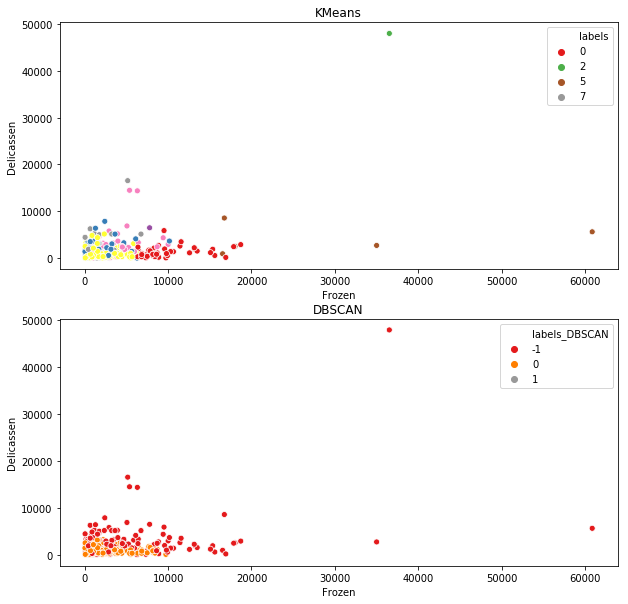

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
ax1 = sns.scatterplot(data=customers, x='Frozen', y='Delicassen', hue='labels', palette="Set1")
plt.legend(loc='upper right')
ax1.set_title('KMeans')

plt.subplot(2, 1, 2)
ax2 = sns.scatterplot(data=customers, x='Frozen', y='Delicassen', hue='labels_DBSCAN', palette="Set1")
plt.legend(loc='upper right')
ax2.set_title('DBSCAN')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [24]:
pd.pivot_table(data=customers, index=['labels'], aggfunc='mean')


,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,labels_DBSCAN
labels,,,,,,,
0,1365.818182,496.795455,14585.477273,9859.931818,3822.863636,3630.886364,-0.590909
1,1463.244898,5736.346939,4856.061224,1534.183673,13542.020408,9039.326531,-0.602041
2,47943.000000,239.000000,36847.000000,36534.000000,20170.000000,43950.000000,-1.000000
3,2708.800000,29974.200000,25603.000000,2636.000000,61472.200000,43460.600000,-1.000000
4,879.066038,819.641509,8413.882075,1716.349057,3297.900943,2548.490566,-0.094340
5,4054.600000,1709.800000,57700.200000,29437.800000,9968.800000,11295.600000,-1.000000
6,2460.425926,1237.185185,32624.407407,3033.703704,6207.444444,4367.259259,-0.592593
7,3164.952381,13552.619048,7792.952381,2041.619048,28166.952381,19566.714286,-1.000000


In [25]:
pd.pivot_table(data=customers, index=['labels_DBSCAN'], aggfunc='mean')

,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,labels
labels_DBSCAN,,,,,,,
-1,2510.781609,5291.373563,15608.988506,4786.275862,13693.298851,10000.408046,3.160920
0,881.773946,1322.134100,9030.398467,1963.432950,4234.061303,3077.318008,3.367816
1,784.800000,416.200000,41446.600000,1276.400000,2167.600000,1421.200000,6.000000


In [26]:
customers.groupby(by=['labels','labels_DBSCAN']).mean()


Fresh          Milk       Grocery        Frozen  \
labels labels_DBSCAN                                                           
0      -1             16153.576923   4716.884615   4579.538462  11490.000000   
        0             12320.444444   2062.222222   2729.888889   7505.388889   
1      -1              5464.423729  10141.661017  15422.932203   2065.406780   
        0              3935.717949   7371.692308  10696.538462    730.538462   
2      -1             36847.000000  43950.000000  20170.000000  36534.000000   
3      -1             25603.000000  43460.600000  61472.200000   2636.000000   
4      -1              5629.650000   4739.650000   5320.250000   1890.100000   
        0              8703.906250   2320.244792   3087.239583   1698.250000   
5      -1             57700.200000  11295.600000   9968.800000  29437.800000   
6      -1             33620.594595   5287.810811   7522.351351   3638.756757   
        0             25876.916667   2756.416667   3836.416667   1900.333333   
        1             41446.600000   1421.200000   2167.600000   1276.400000   
7      -1              7792.952381  19566.714286  28166.952381   2041.619048   

                      Detergents_Paper    Delicassen  
labels labels_DBSCAN                                  
0      -1                   571.423077   1679.192308  
        0                   389.000000    913.166667  
1      -1                  6296.474576   1606.508475  
        0                  4888.974359   1246.512821  
2      -1                   239.000000  47943.000000  
3      -1                 29974.200000   2708.800000  
4      -1                  1734.700000   1839.750000  
        0                   724.322917    778.994792  
5      -1                  1709.800000   4054.600000  
6      -1                  1524.108108   3065.243243  
        0                   694.583333   1293.750000  
        1                   416.200000    784.800000  
7      -1                 13552.619048   3164.952381

Which algorithm appears to perform better?

In [27]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [28]:
K = [i+1 for i in range(20)]

In [29]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(customer_scale)
    customers[k] = kmeans.labels_

Text(0.5, 1.0, 'DBSCAN')

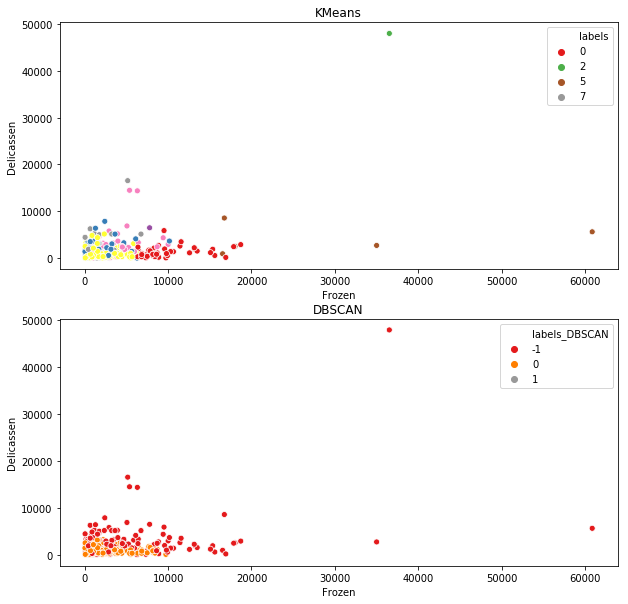

In [30]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
ax1 = sns.scatterplot(data=customers, x='Frozen', y='Delicassen', hue='labels', palette="Set1")
plt.legend(loc='upper right')
ax1.set_title('KMeans')

plt.subplot(2, 1, 2)
ax2 = sns.scatterplot(data=customers, x='Frozen', y='Delicassen', hue='labels_DBSCAN', palette="Set1")
plt.legend(loc='upper right')
ax2.set_title('DBSCAN')

In [31]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [32]:
# Your code here

In [33]:
# Your comment here